The following data is acquired from https://data.tpdc.ac.cn/en/data/6170fc0a-a3be-449a-b451-e95b2d34ecaa/

Further details are provided in the excel sheet - Available_data - AWS_Yakou_ITP_Data_2019 (Sheet name)

The excel sheet contains the following parameters:

1. Wind direction (Wdir, °)
2. Wind speed (Wnd, m/s)
3. The standard deviation of the lateral wind (Std_Uy, m/s)
4. Virtual temperature (Tv, ℃)
5. H2O mass density (H2O, g/m3)
6. CO2 mass density (CO2, mg/m3)
7. Friction velocity (ustar, m/s)
8. stability (z/L)
9. Sensible heat flux (Hs, W/m2)
10. latent heat flux (LE, W/m2)
11. Carbon dioxide flux (Fc, mg/ (m2s))
12. Quality assessment of the sensible heat flux (QA_Hs)
13. Quality assessment of the latent heat flux (QA_LE)
14. Quality assessment of the carbon flux (QA_Fc)

This dataset contains the flux measurements from the Yakou station eddy covariance system (EC) in the upper reaches of the Heihe integrated observatory network from January 1 to December 31 in 2019. The site (100.2421° E, 38.0142° N) was located in the Qilian County in Qinghai Province. The elevation is 4148 m. The EC was installed at a height of 3.2 m, and the sampling rate was 10 Hz. The sonic anemometer faced north, and the separation distance between the sonic anemometer and the CO2/H2O gas analyzer (CSAT3&Li7500A) was 0.15 m.

The raw data acquired at 10 Hz were processed using the Eddypro post-processing software, including the spike detection, lag correction of H2O/CO2 relative to the vertical wind component, sonic virtual temperature correction, coordinate rotation (2-D rotation), corrections for density fluctuation (Webb-Pearman-Leuning correction), and frequency response correction. The EC data were subsequently averaged over 30 min periods. 

The observation data quality was divided into three classes according to the quality assessment method of stationarity (Δst) and the integral turbulent characteristics test (ITC): class 1-3 (high quality), class 4-6 (good), class 7-8 (poor, better than gap filling data), class9 (rejected). In addition to the above processing steps, the half-hourly flux data were screened in a four-step procedure: (1) data from periods of sensor malfunction were rejected; (2) data collected before or after 1 h of precipitation were rejected; (3) incomplete 30 min data were rejected when the missing data constituted more than 3% of the 30 min raw record. There were 48 records per day, and the missing data were replaced with -6999. Suspicious data were marked in red. The power loss occurs occasionally at this site.

The released data contained the following variables: data/time, wind direction (Wdir, °), wind speed (Wnd, m/s), the standard deviation of the lateral wind (Std_Uy, m/s), virtual temperature (Tv, ℃), H2O mass density (H2O, g/m3), CO2 mass density (CO2, mg/m3), friction velocity (ustar, m/s), stability (z/L), sensible heat flux (Hs, W/m2), latent heat flux (LE, W/m2), carbon dioxide flux (Fc, mg/ (m2s)), quality assessment of the sensible heat flux (QA_Hs), quality assessment of the latent heat flux (QA_LE), and quality assessment of the carbon flux (QA_Fc). In this dataset, the time of 0:30 corresponds to the average data for the period between 0:00 and 0:30; the data were stored in *.xls format. Detailed information can be found in the suggested references.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
sns.set()

In [3]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [4]:
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Reading the data

### Extracting the data for the eddy covariance dataset - 

In [5]:
df_EC = pd.read_excel('Eddy_covariance_ITP_Data_2019.xlsx',index_col=0,parse_dates=True)  
df_EC.head()

,Wdir,Wnd,Std_uy,Ts,H2O,CO2,Ustar,L,Hs,LE,Fc,QA_Hs,QA_LE,QA_Fc
Date,,,,,,,,,,,,,,
2019-01-01 00:30:00.000,214.826,2.34398,0.296104,-13.485,4.312548,479.1028,0.091335,8.35684,-5.57460,-0.557123,-0.001237,4,7,2
2019-01-01 01:00:00.000,193.535,1.91822,0.771710,-14.179,4.340844,480.2292,0.194993,-88.91610,5.09827,-1.613740,0.008177,7,6,8
2019-01-01 01:29:59.990,210.478,3.35278,0.744717,-14.267,4.334994,479.8860,0.173838,39.23320,-8.18490,-0.394768,-0.006117,5,9,6
2019-01-01 01:59:59.985,201.906,2.92609,0.400966,-14.850,4.346190,480.8540,0.118849,9.09772,-11.27850,-0.124429,-0.000287,1,4,1
2019-01-01 02:29:59.980,186.329,2.24885,0.640294,-14.997,4.346460,480.8672,0.167208,41.42400,-6.89613,-0.953808,0.003200,2,4,1


In [6]:
len(df_EC.columns)

14

### Extracting the details about the Eddy covariance met data - 

In [7]:
df_EC_details = pd.read_excel('../Available_data.xlsx', sheet_name='Eddy_covariance_ITP_Data_2019_e',index_col=0,parse_dates=True)  
df_EC_details.head()

,Parameter,Variable name,Depth/Height [m],Time steps [mins],Time interval,Units,Comments
Sl.No.,,,,,,,
1,"wind direction (Wdir, °)",Wdir,3.2,30,01.01.2019 00:30 - 31.12.2019 23:30,°,NaN
2,"wind speed (Wnd, m/s)",Wnd,3.2,30,01.01.2019 00:30 - 31.12.2019 23:30,m/s,NaN
3,the standard deviation of the lateral wind (S...,Std_uy,3.2,30,01.01.2019 00:30 - 31.12.2019 23:30,m/s,NaN
4,"virtual temperature (Tv, ℃)",Ts,3.2,30,01.01.2019 00:30 - 31.12.2019 23:30,°C,NaN
5,"H2O mass density (H2O, g/m3)",H2O,3.2,30,01.01.2019 00:30 - 31.12.2019 23:30,g/m3,NaN


In [8]:
### Renaming the columns - 
data_EC = df_EC.copy()
data_EC.columns = df_EC_details['Parameter'].values

data_EC.columns

Index(['wind direction (Wdir, °)', 'wind speed (Wnd, m/s)',
       ' the standard deviation of the lateral wind (Std_Uy, m/s)',
       'virtual temperature (Tv, ℃)', 'H2O mass density (H2O, g/m3)',
       'CO2 mass density (CO2, mg/m3)', ' friction velocity (ustar, m/s)',
       'stability (z/L)', 'sensible heat flux (Hs, W/m2)',
       'latent heat flux (LE, W/m2)', 'carbon dioxide flux (Fc, mg/ (m2s))',
       'quality assessment of the sensible heat flux (QA_Hs)',
       'quality assessment of the latent heat flux (QA_LE)',
       'quality assessment of the carbon flux (QA_Fc)'],
      dtype='object')

### The data has -6999 values for missing data
- Therefore replacing -6999 with NaN vaues

In [9]:
data_EC['2019-01-04']

,"wind direction (Wdir, °)","wind speed (Wnd, m/s)","the standard deviation of the lateral wind (Std_Uy, m/s)","virtual temperature (Tv, ℃)","H2O mass density (H2O, g/m3)","CO2 mass density (CO2, mg/m3)","friction velocity (ustar, m/s)",stability (z/L),"sensible heat flux (Hs, W/m2)","latent heat flux (LE, W/m2)","carbon dioxide flux (Fc, mg/ (m2s))",quality assessment of the sensible heat flux (QA_Hs),quality assessment of the latent heat flux (QA_LE),quality assessment of the carbon flux (QA_Fc)
Date,,,,,,,,,,,,,,
2019-01-04 00:00:00,327.501,2.070820,0.408650,-17.136,-6999.0,-6999.0,0.097642,45.83110,-1.24136,-6999.0,-6999.0,6,-6999,-6999
2019-01-04 00:30:00,342.545,1.016570,0.396809,-17.124,-6999.0,-6999.0,0.088666,11.54040,-3.69099,-6999.0,-6999.0,5,-6999,-6999
2019-01-04 01:00:00,356.465,1.237400,0.406943,-17.122,-6999.0,-6999.0,0.102883,23.87990,-2.78609,-6999.0,-6999.0,5,-6999,-6999
2019-01-04 01:30:00,307.172,0.112285,0.369973,-17.366,-6999.0,-6999.0,0.446548,-2034.35000,2.67383,-6999.0,-6999.0,7,-6999,-6999
2019-01-04 02:00:00,153.900,1.628870,0.247107,-17.910,-6999.0,-6999.0,0.128675,35.68570,-3.64650,-6999.0,-6999.0,5,-6999,-6999
2019-01-04 02:30:00,147.844,1.605390,0.233388,-17.820,-6999.0,-6999.0,0.115326,-44.00340,2.12878,-6999.0,-6999.0,7,-6999,-6999
2019-01-04 03:00:00,134.440,2.882100,0.381534,-17.729,-6999.0,-6999.0,0.075819,2.96132,-8.98806,-6999.0,-6999.0,1,-6999,-6999
2019-01-04 03:30:00,144.352,3.406010,0.351363,-18.166,-6999.0,-6999.0,0.113758,4.11574,-21.84300,-6999.0,-6999.0,1,-6999,-6999
2019-01-04 04:00:00,132.161,4.359550,0.183571,-18.183,-6999.0,-6999.0,0.080788,4.68867,-6.86682,-6999.0,-6999.0,1,-6999,-6999


In [10]:
data_EC_syn = data_EC.copy()
data_EC_syn = data_EC_syn.replace([-6999], [None])

In [11]:
data_EC_syn = data_EC_syn.astype('float64',copy=False)

In [12]:
data_EC_syn.dtypes

wind direction (Wdir, °)                                     float64
wind speed (Wnd, m/s)                                        float64
 the standard deviation of the lateral wind (Std_Uy, m/s)    float64
virtual temperature (Tv, ℃)                                  float64
H2O mass density (H2O, g/m3)                                 float64
CO2 mass density (CO2, mg/m3)                                float64
 friction velocity (ustar, m/s)                              float64
stability (z/L)                                              float64
sensible heat flux (Hs, W/m2)                                float64
latent heat flux (LE, W/m2)                                  float64
carbon dioxide flux (Fc, mg/ (m2s))                          float64
quality assessment of the sensible heat flux (QA_Hs)         float64
quality assessment of the latent heat flux (QA_LE)           float64
quality assessment of the carbon flux (QA_Fc)                float64
dtype: object

In [13]:
data_EC_syn['2019-01-04']

,"wind direction (Wdir, °)","wind speed (Wnd, m/s)","the standard deviation of the lateral wind (Std_Uy, m/s)","virtual temperature (Tv, ℃)","H2O mass density (H2O, g/m3)","CO2 mass density (CO2, mg/m3)","friction velocity (ustar, m/s)",stability (z/L),"sensible heat flux (Hs, W/m2)","latent heat flux (LE, W/m2)","carbon dioxide flux (Fc, mg/ (m2s))",quality assessment of the sensible heat flux (QA_Hs),quality assessment of the latent heat flux (QA_LE),quality assessment of the carbon flux (QA_Fc)
Date,,,,,,,,,,,,,,
2019-01-04 00:00:00,327.501,2.070820,0.408650,-17.136,NaN,NaN,0.097642,45.83110,-1.24136,NaN,NaN,6.0,NaN,NaN
2019-01-04 00:30:00,342.545,1.016570,0.396809,-17.124,NaN,NaN,0.088666,11.54040,-3.69099,NaN,NaN,5.0,NaN,NaN
2019-01-04 01:00:00,356.465,1.237400,0.406943,-17.122,NaN,NaN,0.102883,23.87990,-2.78609,NaN,NaN,5.0,NaN,NaN
2019-01-04 01:30:00,307.172,0.112285,0.369973,-17.366,NaN,NaN,0.446548,-2034.35000,2.67383,NaN,NaN,7.0,NaN,NaN
2019-01-04 02:00:00,153.900,1.628870,0.247107,-17.910,NaN,NaN,0.128675,35.68570,-3.64650,NaN,NaN,5.0,NaN,NaN
2019-01-04 02:30:00,147.844,1.605390,0.233388,-17.820,NaN,NaN,0.115326,-44.00340,2.12878,NaN,NaN,7.0,NaN,NaN
2019-01-04 03:00:00,134.440,2.882100,0.381534,-17.729,NaN,NaN,0.075819,2.96132,-8.98806,NaN,NaN,1.0,NaN,NaN
2019-01-04 03:30:00,144.352,3.406010,0.351363,-18.166,NaN,NaN,0.113758,4.11574,-21.84300,NaN,NaN,1.0,NaN,NaN
2019-01-04 04:00:00,132.161,4.359550,0.183571,-18.183,NaN,NaN,0.080788,4.68867,-6.86682,NaN,NaN,1.0,NaN,NaN


In [14]:
### Check for NaN values
data_EC_syn.index[np.where(np.isnan(data_EC_syn))[0]]

DatetimeIndex(['2019-01-03 20:30:00', '2019-01-03 20:30:00',
               '2019-01-03 20:30:00', '2019-01-03 21:00:00',
               '2019-01-03 21:00:00', '2019-01-03 21:00:00',
               '2019-01-03 21:30:00', '2019-01-03 21:30:00',
               '2019-01-03 21:30:00', '2019-01-03 21:30:00',
               ...
               '2019-12-25 12:00:00', '2019-12-25 12:30:00',
               '2019-12-25 12:30:00', '2019-12-25 14:00:00',
               '2019-12-25 14:00:00', '2019-12-25 14:00:00',
               '2019-12-25 14:00:00', '2019-12-25 14:00:00',
               '2019-12-25 14:00:00', '2019-12-25 14:00:00'],
              dtype='datetime64[ns]', name='Date', length=50935, freq=None)

In [15]:
data_EC_group = data_EC_syn.copy()

### Resampling the data to daily mean values 
* To observe the data on a seasonal scale

In [16]:
data_EC_syn = data_EC_syn.resample('D').mean()

In [17]:
data_EC_syn.index[np.where(np.isnan(data_EC_syn))[0]]

DatetimeIndex(['2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04',
               '2019-01-04', '2019-01-04', '2019-04-24', '2019-04-24',
               '2019-04-24', '2019-04-24',
               ...
               '2019-12-02', '2019-12-02', '2019-12-02', '2019-12-02',
               '2019-12-02', '2019-12-02', '2019-12-02', '2019-12-02',
               '2019-12-02', '2019-12-02'],
              dtype='datetime64[ns]', name='Date', length=317, freq=None)

### Plotting Wind speed, Virtual temperature, Sensible heat flux, Latent heat flux

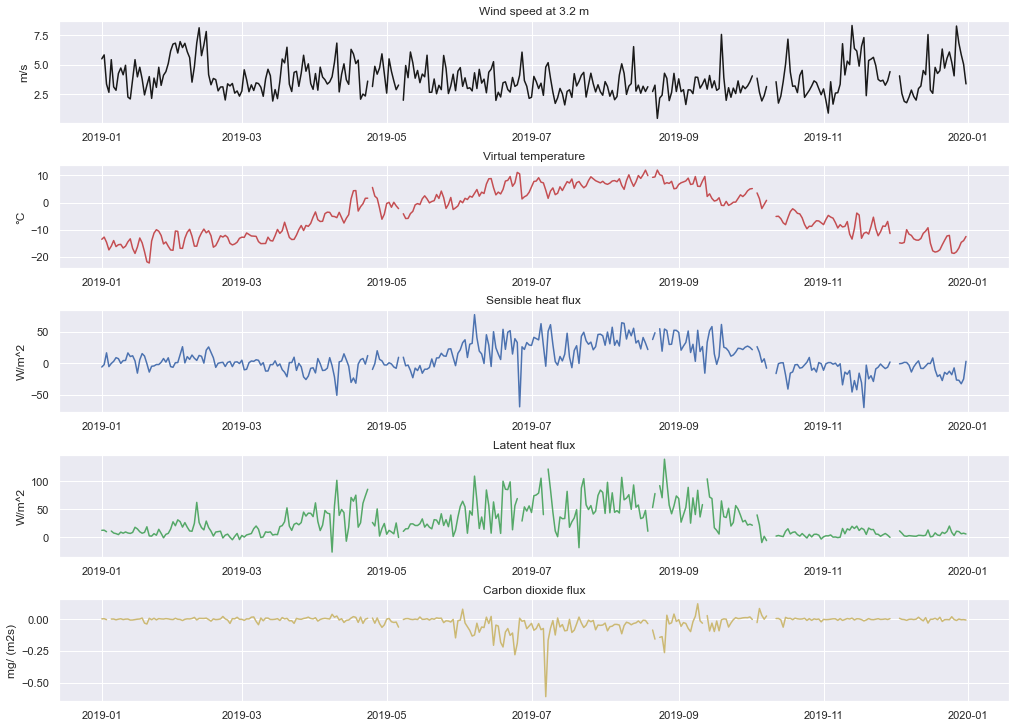

In [18]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])


f2_ax1.set_title('Wind speed at 3.2 m')
f2_ax1.plot(data_EC_syn['wind speed (Wnd, m/s)'],'k', label='Wind speed')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('Virtual temperature')
f2_ax2.plot(data_EC_syn['virtual temperature (Tv, ℃)'], 'r',label='virtual temperature (Tv, ℃)')
f2_ax2.set_ylabel('°C')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('Sensible heat flux')
f2_ax3.plot(data_EC_syn['sensible heat flux (Hs, W/m2)'], 'b',label='sensible heat flux (Hs, W/m2)')
f2_ax3.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Latent heat flux')
f2_ax4.plot(data_EC_syn['latent heat flux (LE, W/m2)'], 'g',label='latent heat flux (LE, W/m2)')
f2_ax4.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Carbon dioxide flux')
f2_ax5.plot(data_EC_syn['carbon dioxide flux (Fc, mg/ (m2s))'], 'y',label='carbon dioxide flux (Fc, mg/ (m2s))')
f2_ax5.set_ylabel('mg/ (m2s)')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax5.grid(True)


Comments:
1. Sensible heat flux :
    * It is positive when heat flows from the atmosphere to the surface. (During the summer)
    * The values of heat flux seems to be quite high.
2. Latent heat flux:
    * It is positive when it releases heat (from gas to liquid) during winter?
    * It is negative when it absorbs heat (from liquid to gas) during summer?

### Categorising dataset based on quality and plotting the data set

- The observation data is divided into three classes:
    * Class 1-3 : high quality (A)
    * Class 4-6 : good (B)
    * Class 7-8 : poor - better than gap filling data (C)
    * Class 9 : rejected (D)

- Questions:
    * Till which quality of data can agree upon? - High quality and good quality dataset can be used. Poor quality can be checked if required (we can decide based on the percentage of data available

#### Categorizing the dataset using groupby function:

Source: https://www.marsja.se/python-pandas-groupby-tutorial-examples/
Source: https://towardsdatascience.com/how-to-use-the-split-apply-combine-strategy-in-pandas-groupby-29e0eb44b62e

- Considering the 30 min dataset

In [19]:
data_EC_group.columns

Index(['wind direction (Wdir, °)', 'wind speed (Wnd, m/s)',
       ' the standard deviation of the lateral wind (Std_Uy, m/s)',
       'virtual temperature (Tv, ℃)', 'H2O mass density (H2O, g/m3)',
       'CO2 mass density (CO2, mg/m3)', ' friction velocity (ustar, m/s)',
       'stability (z/L)', 'sensible heat flux (Hs, W/m2)',
       'latent heat flux (LE, W/m2)', 'carbon dioxide flux (Fc, mg/ (m2s))',
       'quality assessment of the sensible heat flux (QA_Hs)',
       'quality assessment of the latent heat flux (QA_LE)',
       'quality assessment of the carbon flux (QA_Fc)'],
      dtype='object')

In [20]:
data_EC_SHF = data_EC_group.groupby('quality assessment of the sensible heat flux (QA_Hs)')
data_EC_SHF.size()

# Provides the number of values under each quality criteria 

quality assessment of the sensible heat flux (QA_Hs)
1.0    6511
2.0    1098
3.0      36
4.0     910
5.0    2189
6.0     455
7.0     920
8.0     444
9.0     191
dtype: int64

In [21]:
#data_EC_group.groupby(['quality assessment of the sensible heat flux (QA_Hs)']).apply()

TypeError: apply() missing 1 required positional argument: 'func'

In [22]:
# Creating new columns - to categorise
data_EC_group['Quality_Group_SHF'] = None
data_EC_group['Quality_Group_LH'] = None
data_EC_group['Quality_Group_CF'] = None

In [23]:
# https://www.interviewqs.com/ddi-code-snippets/rows-cols-python

Group_A = [1,2,3] # high quality 
Group_B = [4,5,6] # good quality
Group_C = [7,8] # Bad quality
Group_D = [9] # Rejected


In [24]:
# Quality group - sensible heat flux
data_EC_group['Quality_Group_SHF'].loc[data_EC_group['quality assessment of the sensible heat flux (QA_Hs)'].isin(Group_A)] = 'A'
data_EC_group['Quality_Group_SHF'].loc[data_EC_group['quality assessment of the sensible heat flux (QA_Hs)'].isin(Group_B)] = 'B'
data_EC_group['Quality_Group_SHF'].loc[data_EC_group['quality assessment of the sensible heat flux (QA_Hs)'].isin(Group_C)] = 'C'
data_EC_group['Quality_Group_SHF'].loc[data_EC_group['quality assessment of the sensible heat flux (QA_Hs)'].isin(Group_D)] = 'D'


In [25]:
# Quality group - latent heat flux
data_EC_group['Quality_Group_LH'].loc[data_EC_group['quality assessment of the latent heat flux (QA_LE)'].isin(Group_A)] = 'A'
data_EC_group['Quality_Group_LH'].loc[data_EC_group['quality assessment of the latent heat flux (QA_LE)'].isin(Group_B)] = 'B'
data_EC_group['Quality_Group_LH'].loc[data_EC_group['quality assessment of the latent heat flux (QA_LE)'].isin(Group_C)] = 'C'
data_EC_group['Quality_Group_LH'].loc[data_EC_group['quality assessment of the latent heat flux (QA_LE)'].isin(Group_D)] = 'D'


In [26]:
# Quality group - Carbon flux
data_EC_group['Quality_Group_CF'].loc[data_EC_group['quality assessment of the carbon flux (QA_Fc)'].isin(Group_A)] = 'A'
data_EC_group['Quality_Group_CF'].loc[data_EC_group['quality assessment of the carbon flux (QA_Fc)'].isin(Group_B)] = 'B'
data_EC_group['Quality_Group_CF'].loc[data_EC_group['quality assessment of the carbon flux (QA_Fc)'].isin(Group_C)] = 'C'
data_EC_group['Quality_Group_CF'].loc[data_EC_group['quality assessment of the carbon flux (QA_Fc)'].isin(Group_D)] = 'D'

In [27]:
data_EC_group.head()

,"wind direction (Wdir, °)","wind speed (Wnd, m/s)","the standard deviation of the lateral wind (Std_Uy, m/s)","virtual temperature (Tv, ℃)","H2O mass density (H2O, g/m3)","CO2 mass density (CO2, mg/m3)","friction velocity (ustar, m/s)",stability (z/L),"sensible heat flux (Hs, W/m2)","latent heat flux (LE, W/m2)","carbon dioxide flux (Fc, mg/ (m2s))",quality assessment of the sensible heat flux (QA_Hs),quality assessment of the latent heat flux (QA_LE),quality assessment of the carbon flux (QA_Fc),Quality_Group_SHF,Quality_Group_LH,Quality_Group_CF
Date,,,,,,,,,,,,,,,,,
2019-01-01 00:30:00.000,214.826,2.34398,0.296104,-13.485,4.312548,479.1028,0.091335,8.35684,-5.57460,-0.557123,-0.001237,4.0,7.0,2.0,B,C,A
2019-01-01 01:00:00.000,193.535,1.91822,0.771710,-14.179,4.340844,480.2292,0.194993,-88.91610,5.09827,-1.613740,0.008177,7.0,6.0,8.0,C,B,C
2019-01-01 01:29:59.990,210.478,3.35278,0.744717,-14.267,4.334994,479.8860,0.173838,39.23320,-8.18490,-0.394768,-0.006117,5.0,9.0,6.0,B,D,B
2019-01-01 01:59:59.985,201.906,2.92609,0.400966,-14.850,4.346190,480.8540,0.118849,9.09772,-11.27850,-0.124429,-0.000287,1.0,4.0,1.0,A,B,A
2019-01-01 02:29:59.980,186.329,2.24885,0.640294,-14.997,4.346460,480.8672,0.167208,41.42400,-6.89613,-0.953808,0.003200,2.0,4.0,1.0,A,B,A


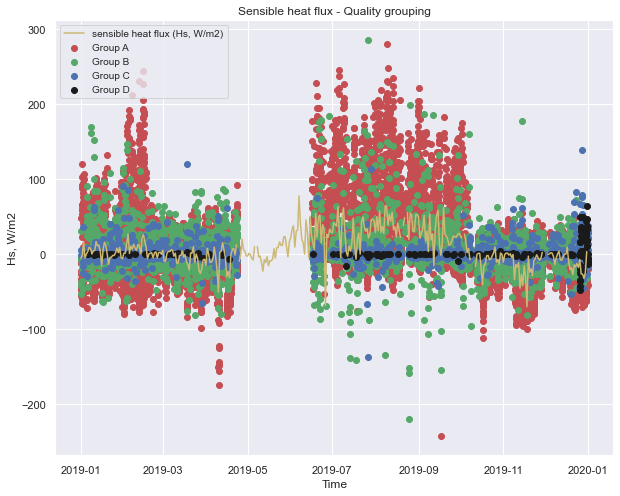

In [29]:
# Plotting the lines 
plt.figure(figsize=(10,8))
Group_A_SHF = data_EC_group['sensible heat flux (Hs, W/m2)'].loc[data_EC_group['Quality_Group_SHF'] == 'A']
Group_B_SHF = data_EC_group['sensible heat flux (Hs, W/m2)'].loc[data_EC_group['Quality_Group_SHF'] == 'B']
Group_C_SHF = data_EC_group['sensible heat flux (Hs, W/m2)'].loc[data_EC_group['Quality_Group_SHF'] == 'C']
Group_D_SHF = data_EC_group['sensible heat flux (Hs, W/m2)'].loc[data_EC_group['Quality_Group_SHF'] == 'D']

plt.scatter(Group_A_SHF.index, Group_A_SHF, c='r',label='Group A')
plt.scatter(Group_B_SHF.index, Group_B_SHF, c='g',label='Group B')
plt.scatter(Group_C_SHF.index, Group_C_SHF, c='b',label='Group C')
plt.scatter(Group_D_SHF.index, Group_D_SHF, c='k',label='Group D')
plt.plot(data_EC_syn['sensible heat flux (Hs, W/m2)'], 'y',label='sensible heat flux (Hs, W/m2)')
plt.xlabel('Time')
# Set the y axis label of the current axis.
plt.ylabel('Hs, W/m2')
# Set a title of the current axes.
plt.title('Sensible heat flux - Quality grouping')
# show a legend on the plot
plt.legend(loc=2,fontsize=10)
# Display a figure.
plt.show()


In [32]:
data_EC_group[['sensible heat flux (Hs, W/m2)','Quality_Group_SHF']]['2019-05':'2019-07']

,"sensible heat flux (Hs, W/m2)",Quality_Group_SHF
Date,,
2019-05-01 00:00:00,-8.482032,None
2019-05-01 00:30:00,-11.516430,None
2019-05-01 01:00:00,-9.154814,None
2019-05-01 01:30:00,-2.566988,None
2019-05-01 02:00:00,-10.512910,None
...,...,...
2019-07-31 21:30:00,-21.455300,A
2019-07-31 22:00:00,-18.506500,A
2019-07-31 22:30:00,-8.372520,A


Questions:
    * Will we be using the sensible heat flux and latent heat flux data in the CHG model? If yes, which time scale do we need to consider? - If we consider a daily time scale, then the sensible heat flux values reduce by a greater extent?
    * Which quality groups do we consider in our analysis - Group A & Group B ( probably group C? - for missing data)
    * What to do about the missing data? - We can consider replacing it by previous year values, finding mean between two points - rolling average, modelling the sensible and latent heat flux? etc.
    * Any other queries?